In [ ]:
# Intro to natural language processing with the NLTK package
# Add BeautifulSoup to parse a webpage
# Create a word cloud to dispaly results.

# https://www.nltk.org/
# https://realpython.com/nltk-nlp-python/
# https://github.com/amueller/word_cloud


import os, sys
from io import BytesIO
import requests
import numpy
import pandas
import PIL
from PIL import Image
from matplotlib import pyplot

import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request

In [8]:
#connect to your drive to get and save data
#Set up your local datapath
from google.colab import drive
drive.mount('/content/drive')
#change this based on your setup
root = '/content/drive/MyDrive/ART/creativecomputing/'
datapath =  root + 'data/'

Mounted at /content/drive


In [2]:
# Webtext parsing functions
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return (u" ".join(t.strip() for t in visible_texts))

In [3]:
# Text filter function; filter based on some conditions
def filter_words(x):
    # Not in common English words
    cond_1 = x.lower() not in stop_words
    # Not a number
    cond_2 = not x.isnumeric()
    # Length of at least 3
    cond_3 = len(x)>2
    return (cond_1 and cond_2 and cond_3)

In [23]:
# CAREFULLY Select a webpage
#url = 'https://www.nytimes.com/2021/10/19/us/puerto-rico-electricity-protest.html?action=click&module=Well&pgtype=Homepage&section=US%20News'
url = 'https://www.npr.org/2021/05/09/995173022/deadly-protests-against-economic-inequality-and-police-brutality-continue-in-col'
html = urllib.request.urlopen(url).read()
webtext = text_from_html(html)
print(webtext)

     Accessibility links   Skip to main content  Keyboard shortcuts for audio player         Open Navigation Menu           NPR Shop         Close Navigation Menu      Home     News  Expand/collapse submenu for News    National  World  Politics  Business  Health  Science  Climate  Race      Arts & Life  Expand/collapse submenu for Arts & Life    Books  Movies  Television  Pop Culture  Food  Art & Design   Performing Arts  Life Kit      Music  Expand/collapse submenu for Music    #NowPlaying   Tiny Desk   All Songs Considered   Music News   Music Features   Live Sessions      Podcasts & Shows  Expand/collapse submenu for Podcasts & Shows    Daily     Morning Edition     Weekend Edition Saturday     Weekend Edition Sunday     All Things Considered     Fresh Air     Up First    Featured    NPR's Book of the Day    Wisdom From The Top with Guy Raz    Invisibilia    It's Been a Minute with Sam Sanders    More Podcasts & Shows       Search       NPR Shop                 #NowPlaying   Tiny De

In [24]:
#Tokenize the text
token_text = word_tokenize(webtext)
print(token_text) 
print()

['Accessibility', 'links', 'Skip', 'to', 'main', 'content', 'Keyboard', 'shortcuts', 'for', 'audio', 'player', 'Open', 'Navigation', 'Menu', 'NPR', 'Shop', 'Close', 'Navigation', 'Menu', 'Home', 'News', 'Expand/collapse', 'submenu', 'for', 'News', 'National', 'World', 'Politics', 'Business', 'Health', 'Science', 'Climate', 'Race', 'Arts', '&', 'Life', 'Expand/collapse', 'submenu', 'for', 'Arts', '&', 'Life', 'Books', 'Movies', 'Television', 'Pop', 'Culture', 'Food', 'Art', '&', 'Design', 'Performing', 'Arts', 'Life', 'Kit', 'Music', 'Expand/collapse', 'submenu', 'for', 'Music', '#', 'NowPlaying', 'Tiny', 'Desk', 'All', 'Songs', 'Considered', 'Music', 'News', 'Music', 'Features', 'Live', 'Sessions', 'Podcasts', '&', 'Shows', 'Expand/collapse', 'submenu', 'for', 'Podcasts', '&', 'Shows', 'Daily', 'Morning', 'Edition', 'Weekend', 'Edition', 'Saturday', 'Weekend', 'Edition', 'Sunday', 'All', 'Things', 'Considered', 'Fresh', 'Air', 'Up', 'First', 'Featured', 'NPR', "'s", 'Book', 'of', 'the'

In [ ]:
# Counts of each word
counts = Counter(token_text)

# Convert to a pandas DataFrame
counts_df = pandas.DataFrame.from_dict(counts, orient='index', columns=['count'])
counts_df.index.name = 'word'
counts_df.reset_index(inplace=True)

# Apply word filter from function above
counts_df = counts_df[counts_df['word'].apply(filter_words)]
counts_df.set_index('word', inplace=True)

# Sort by count descending and show the top 20 words
print(counts_df.sort_values('count', ascending=False).head(20))

In [14]:
# Select a background image from a web resource. 
url = 'https://i2.wp.com/saccityexpress.com/wp-content/uploads/2014/02/MLK.jpg?w=1900&ssl=1'

# Use requests to get the image data and then uses BytesIO and Image.open() to import the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Make mask, define the dimensions
xdim = 1000
ydim = 1000
img = img.resize((xdim, ydim),Image.ANTIALIAS) 

In [26]:
# Alternate image access approach: Use a custom made background ---------
# 1. create a .png image (black and white only, no transparency)
# 2. copy the image (.png) to the data folder of your google cloud
# 3. get the file into a variable as below
# 4. adjust the dimensions xdim and ydim below according to your image

img_path = datapath + 'mask_w.png'
img = Image.open(img_path)
# Make mask, define the dimensions
xdim = 1000
ydim = 1000
img = img.resize((xdim, ydim),Image.ANTIALIAS) 

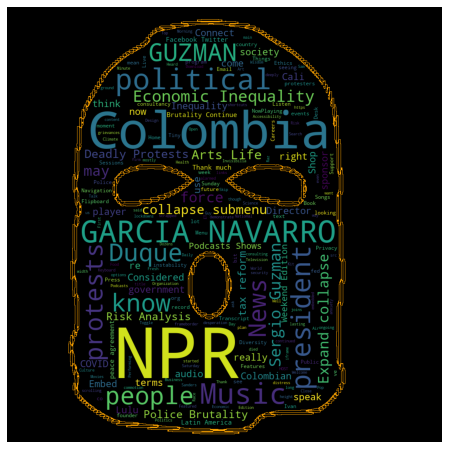

In [27]:
# Create the wave_mask by converting the image data into a numpy array (same dimensions)
wave_mask = numpy.array(img)
wordcloud = WordCloud(width=xdim, height=ydim, mask=wave_mask, random_state=80,  contour_width=1, contour_color='orange').generate(" ".join(token_text))

# Create matplotlib figure
fig = pyplot.figure(figsize=(8, 8))

#display and save
image = wordcloud.to_image()
image.show()
quality_val = 100

#enable access to google drive first..
#image.save(datapath+'webtext.jpg', 'JPEG', quality=quality_val)

#show the result in a preview
pyplot.axis('off')
pyplot.imshow(wordcloud)
pyplot.show()